**Analysis of the SIR Model:** 

The SIR model of infection spread is a set of differential equations describing how an infection spreads in a population.

The exact differential equations are given below:

$\frac{dS}{dt} = -b S(t) I(t)  \\
\frac{dI}{dt} = b S(t) I(t) - k I(t) \\
\frac{dR}{dt} = k I(t)$

Here, $S(t)$ describes the number of susceptible individuals, $I(t)$ represents the number of infected individuals and $R(t)$ describes the number of recovered individuals. The values of the parameters $b$ and $k$ are unknown, but can be estimated from the data. Here we will assume $b = 1/2$ and $k = 1/3$.  
The intial conditions are:  
$S(0) = 1 \\ I(0) = 1.27e-6 \\ R(0) = 0$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [19]:
class Model:
    
    def __init__(self, S0=1, I0=1.27e-6, R0=0, b = 0.5, k = 1/3):
        self.S0 = S0
        self.I0 = I0
        self.R0 = R0
        self.b = b
        self.k = k
        
    @staticmethod
    def diff_eqns(state, t, self):
        
        S, I, R = state
        
        #writing the differential equations
        dSdt = -self.b*S*I
        dIdt = self.b*S*I - self.k*I
        dRdt = self.k*I
        
        return dSdt, dIdt, dRdt
        
    def execute(self, intial_vals, t_start = 0, t_end = 150, t_interval = 1, return_vals=False, plot=True):
        
        #intial_vals must be a liist in the form of [S, I, R]
        t = np.arange(t_start, t_end, t_interval)
        state = odeint(self.diff_eqns, initial_vals, t, args=(self,))
        
        S = state[:, 0]
        I = state[:, 1]
        R = state[:, 2]
        
        if plot:
            
            plt.plot(t, S, "b-", label="Susceptible Individuals")
            plt.plot(t, I, "r-", label="Infected Individuals")
            plt.plot(t, R, "g-", label = "Recovered Infividuals")
            
            plt.legend()
            
            plt.xlabel("Days")
            plt.title("Simulation of the SIR model")
            
        if return_vals:
            return S, I, R
        
        

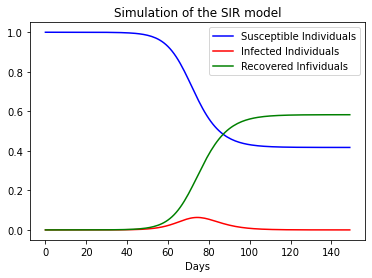

In [20]:
model = Model()

#S, I , R
initial_vals = [1, 1.27e-6, 0]

model.execute(initial_vals, t_start = 0, t_end=150, t_interval=1)